In [1]:
num = int(input("Enter a decimal number: "))
print("Binary: " + bin(num).replace("0b",""))
print("Octal: " + oct(num).replace("0o",""))
print("Hexdecimal: " + hex(num).replace("0x","").upper())

Enter a decimal number: 10000
Binary: 10011100010000
Octal: 23420
Hexdecimal: 2710


In [2]:
import pandas as pd
cast = pd.read_csv('cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [3]:
len(cast[cast["title"].str.contains("Hamlet")].index)

891

In [4]:
cast[cast["title"] == "Treasure Island"].sort_values(by=["year"])

,title,year,name,type,character,n
1312766,Treasure Island,1918,Herschel Mayall,actor,Prologue Player,NaN
3280557,Treasure Island,1918,Eleanor Washington,actress,Prologue Player,NaN
3046750,Treasure Island,1918,Violet Radcliffe,actress,Long John Silver,3.0
1167783,Treasure Island,1918,Raymond Lee,actor,Bit Role,NaN
1195421,Treasure Island,1918,Elmo Lincoln,actor,Prologue Player,NaN
...,...,...,...,...,...,...
1663860,Treasure Island,1999,Victor Raider-Wexler,actor,Samowitz,10.0
1731182,Treasure Island,1999,Scot Thomas Robinson,actor,Jimmy,11.0
1813707,Treasure Island,1999,Richard Schave,actor,Man,21.0
2710458,Treasure Island,1999,Stephanie Ittleson,actress,Stella,7.0


In [5]:
len(cast[(cast["title"] == "Hamlet") & (cast["year"] == 1921)].index)

9

year
1890         3
1900        70
1910     41957
1920     69906
1930    196107
1940    206937
1950    202835
1960    174130
1970    200096
1980    269710
1990    368805
2000    732303
2010    870778
2020        58
Name: year, dtype: int64


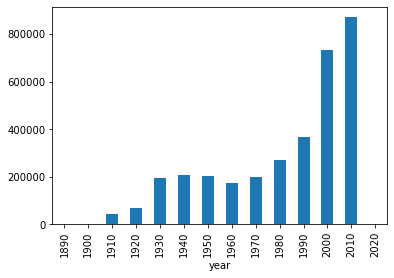

In [6]:
decades = cast.groupby((cast["year"] / 10).map(int) * 10)
print(decades["year"].count())
decades["year"].count().plot.bar()

In [7]:
cast[(1950 <= cast["year"]) & (cast["year"] < 1960) & (cast["n"] == 1)].groupby("type")["name"].count()

type
actor      6388
actress    2813
Name: name, dtype: int64

In [8]:
cast[(cast["year"] >= 1990) & (cast["n"] == 1)].groupby("name")["title"].count().sort_values(ascending=False).head(10)

name
Mohanlal              126
Mammootty             118
Akshay Kumar           87
Jayaram                76
Andy Lau               72
Ajay Devgn             69
Eric Roberts           68
Amitabh Bachchan       68
Nagarjuna Akkineni     60
Dilip                  59
Name: title, dtype: int64

In [9]:
frank = cast[cast["name"] == "Frank Oz"].groupby(["title","year"]).count().sort_values(by="year")
frank[frank["name"] > 1]["name"]

title                                     year
The Muppet Movie                          1979    8
The Great Muppet Caper                    1981    6
An American Werewolf in London            1981    2
The Dark Crystal                          1982    2
The Muppets Take Manhattan                1984    7
Sesame Street Presents: Follow that Bird  1985    3
The Muppet Christmas Carol                1992    7
Muppet Treasure Island                    1996    4
Muppets from Space                        1999    4
The Adventures of Elmo in Grouchland      1999    3
Name: name, dtype: int64